In [27]:
'''
Trevor Kleinstuber
'''

import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

directory = '../Cleaned Data/'
files = os.listdir(directory)
data_files = []

for file in files:
    if file[-4:] == '.csv':
        data_files.append(file)
        
data_files

['clean_energy_consumption_data.csv',
 'coal_consumption.csv',
 'disasters.csv',
 'duplicated_spellings.csv',
 'Global_Consumption_and_Temperature.csv',
 'natural_gas_consumption.csv',
 'nuclear_consumption.csv',
 'Passenger use by year.csv',
 'petroleum_consumption.csv',
 'population_density_clean.csv',
 'Temperature_Delta_1986 to 2016.csv',
 'total_consumption.csv']

In [2]:
data_dfs = {}
for data_file in data_files:
    data_dfs[data_file[:-4]] = (
        pd.read_csv(directory + data_file)
    )
    print(data_file)
 

clean_energy_consumption_data.csv
coal_consumption.csv
disasters.csv
duplicated_spellings.csv
Global_Consumption_and_Temperature.csv
natural_gas_consumption.csv
nuclear_consumption.csv
Passenger use by year.csv
petroleum_consumption.csv
population_density_clean.csv
Temperature_Delta_1986 to 2016.csv
total_consumption.csv


In [5]:
temp_df = data_dfs[-2]
temp_df.head()

,Unnamed: 0,Source,Year,Mean
0,0,GCAG,2016,0.9363
1,1,GISTEMP,2016,0.9900
2,2,GCAG,2015,0.8998
3,3,GISTEMP,2015,0.8700
4,4,GCAG,2014,0.7408


In [6]:
temp_df = temp_df[['Year','Mean']]

In [7]:
temp_df = temp_df.groupby('Year').mean()

In [8]:
cons_df = data_dfs[0].set_index('Location')
con_by_year = cons_df.loc['World'].astype(float).sum()

Text(0, 0.5, '+/- C from mean for 1880-2020')

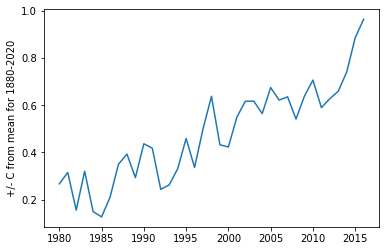

In [9]:
plt.plot(temp_df) #temp_df.Year,temp_df.mean)
plt.ylabel('+/- C from mean for 1880-2020')


In [10]:
plt.savefig('../Images/Temperature_vs_Time.png')

<Figure size 432x288 with 0 Axes>

In [11]:
temp_df = temp_df.reset_index()

In [12]:
temp_df = temp_df[temp_df.Year > 1985]
temp_df

,Year,Mean
6,1986,0.20980
7,1987,0.34980
8,1988,0.39285
9,1989,0.29350
10,1990,0.43640
11,1991,0.41775
12,1992,0.24355
13,1993,0.26265
14,1994,0.33045
15,1995,0.45885


In [13]:
cons_df

,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Location,,,,,,,,,,,,,,,,,,,,,
World,324.5344016,334.5932663,347.6354523,352.3576472,358.9595455,352.2644272,351.0744285,353.9732567,357.8829972,367.8566845,...,493.091062,499.6972405,494.3132499,523.725112,538.7016471,550.8484054,561.7706158,567.0296292,570.0615279,573.9508257
Afghanistan,0.039111199,0.063065158,0.111220787,0.109364539,0.108320341,0.047438198,0.031281766,0.031068733,0.030081109,0.025348473,...,0.034254709,0.058526483,0.095348795,0.118538529,0.161050802,0.147607649,0.124017682,0.113619521,0.125483137,0.117133389
Albania,0.166075365,0.166640543,0.168590876,0.160340585,0.114845298,0.096323694,0.084191203,0.073833402,0.070178183,0.077549738,...,0.09682504,0.105744823,0.115070874,0.128327344,0.105875204,0.104431132,0.127732976,0.116326405,0.116576406,0.12436058
Algeria,1.073661264,1.148639374,1.222947634,1.18021525,1.212354841,1.354444964,1.30211942,1.197210337,1.233072137,1.289074909,...,1.558107806,1.68592524,1.783379231,1.777793483,1.938981898,2.099941293,2.039276069,2.30202481,2.354764812,2.337093871
American Samoa,0.006716584,0.006973009,0.006778814,0.007806191,0.008210538,0.008210538,0.008445519,0.008216196,0.008003583,0.007790971,...,0.008606956,0.008630536,0.008606956,0.008606956,0.004911509,0.004924966,0.004911509,0.004911509,0.004908811,0.004908869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wake Island,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.000019512,0.000019432,0.000028548,0.000047705,0.0000951,0.001081004,0.00143096


In [14]:
con_by_year = pd.DataFrame(con_by_year)
con_by_year.columns = ['Consumption']
con_by_year

,Consumption
1986,649.068803
1987,669.186533
1988,695.270905
1989,704.715294
1990,717.919091
1991,704.528854
1992,702.148857
1993,707.946513
1994,715.765994
1995,735.713369


In [15]:

main = pd.merge(temp_df, con_by_year, left_index=True, right_index=True, how='outer')

In [16]:
con_by_year = con_by_year.reset_index()
con_by_year

,index,Consumption
0,1986,649.068803
1,1987,669.186533
2,1988,695.270905
3,1989,704.715294
4,1990,717.919091
5,1991,704.528854
6,1992,702.148857
7,1993,707.946513
8,1994,715.765994
9,1995,735.713369


In [17]:
con_by_year = con_by_year.rename(columns={'index':'Year'})
con_by_year

,Year,Consumption
0,1986,649.068803
1,1987,669.186533
2,1988,695.270905
3,1989,704.715294
4,1990,717.919091
5,1991,704.528854
6,1992,702.148857
7,1993,707.946513
8,1994,715.765994
9,1995,735.713369


In [18]:
con_by_year.Year = con_by_year.Year.astype(int)
temp_df.Year = temp_df.Year.astype(int)

In [19]:
main = pd.merge(con_by_year, temp_df, on='Year', how='outer')
main

,Year,Consumption,Mean
0,1986,649.068803,0.20980
1,1987,669.186533,0.34980
2,1988,695.270905,0.39285
3,1989,704.715294,0.29350
4,1990,717.919091,0.43640
5,1991,704.528854,0.41775
6,1992,702.148857,0.24355
7,1993,707.946513,0.26265
8,1994,715.765994,0.33045
9,1995,735.713369,0.45885


In [20]:
main = main.rename(columns={'Mean':'Temperature Delta'})
main

,Year,Consumption,Temperature Delta
0,1986,649.068803,0.20980
1,1987,669.186533,0.34980
2,1988,695.270905,0.39285
3,1989,704.715294,0.29350
4,1990,717.919091,0.43640
5,1991,704.528854,0.41775
6,1992,702.148857,0.24355
7,1993,707.946513,0.26265
8,1994,715.765994,0.33045
9,1995,735.713369,0.45885


In [21]:
main.to_csv('../Cleaned Data/Global_Consumption_and_Temperature.csv')

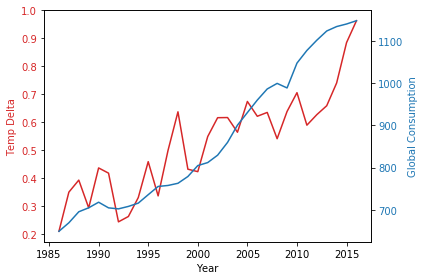

In [22]:
import numpy as np
import matplotlib.pyplot as plt


t = main['Year']
data1 = main['Temperature Delta']
data2 = main['Consumption']

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Temp Delta', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Global Consumption', color=color)  
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.savefig('../Images/Temp et Consumption by year.png')
plt.show()

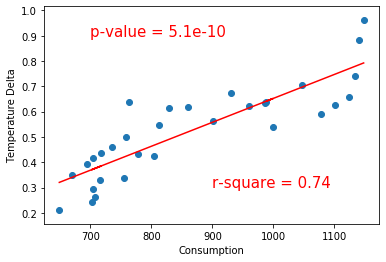

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(data2, data1)
regress_values = data2 * slope + intercept
plt.scatter(data2,data1)
plt.xlabel('Consumption')
plt.ylabel('Temperature Delta')
plt.plot(data2,regress_values,'r')
r_note = "r-square = " + str(round(rvalue**2,2))
plt.annotate(r_note,(900,.3),fontsize=15,color="red")
p_note = "p-value = " + str(round(pvalue,11))
plt.annotate(p_note,(700,.9),fontsize=15,color="red")
plt.savefig('../Images/Correlation of consumption and time.png')

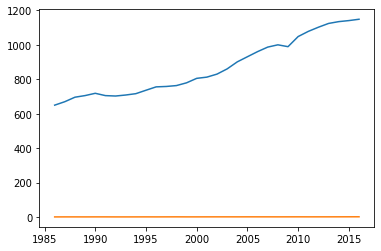

In [23]:
plt.plot(main.Year,main.Consumption)
plt.plot(main.Year,main['Temperature Delta'].astype(float))

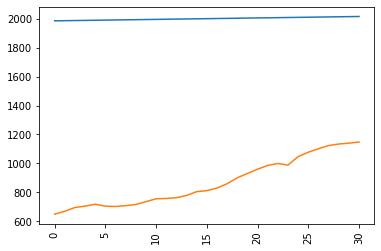

In [24]:
plt.plot(con_by_year)
plt.xticks(rotation=90)
plt.show()